In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
file_path = 'C:/Users/Demi/Desktop/TB2/Mini project/fake_transactional_data_24 (1).csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [4]:
data.tail()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025
10148279,53444.0,2.65,A_LOCAL_COFFEE_SHOP,31/12/2025


In [5]:
data.shape

(10148280, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [7]:
data.describe(include="all")

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
count,1.014828e+07,1.014828e+07,10148280,10148280
unique,NaN,NaN,14300,364
top,NaN,NaN,PUB,12/12/2025
freq,NaN,NaN,834380,52379
mean,5.080502e+04,1.839348e+01,NaN,NaN
std,2.893710e+04,8.612323e+01,NaN,NaN
min,1.000000e+03,1.450000e+00,NaN,NaN
25%,2.530400e+04,2.650000e+00,NaN,NaN
50%,5.078100e+04,6.000000e+00,NaN,NaN
75%,7.563300e+04,1.200000e+01,NaN,NaN


# Understand Data

In [8]:
data.isnull().sum()

from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64

In [9]:
data[data.duplicated()]

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
156,69941.0,5.50,PUB,01/01/2025
157,69941.0,5.50,PUB,01/01/2025
211,96941.0,6.00,WINE_BAR,01/01/2025
225,11202.0,2.40,PRETENTIOUS_COFFEE_SHOP,01/01/2025
254,55042.0,2.65,TOTALLY_A_REAL_COFFEE_SHOP,01/01/2025
...,...,...,...,...
10148193,38552.0,5.00,BAR,31/12/2025
10148194,38552.0,5.00,BAR,31/12/2025
10148195,38552.0,5.00,BAR,31/12/2025
10148210,25930.0,2.65,A_LOCAL_COFFEE_SHOP,31/12/2025


In [10]:
data['from_totally_fake_account']=data['from_totally_fake_account'].astype('object')

In [11]:
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

date_range = pd.date_range(start=data['not_happened_yet_date'].min(), 
                           end=data['not_happened_yet_date'].max())

missing_dates = date_range.difference(data['not_happened_yet_date'])
missing_dates

DatetimeIndex(['2025-08-22'], dtype='datetime64[ns]', freq=None)

Missing Data is 8.22

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   from_totally_fake_account      object        
 1   monopoly_money_amount          float64       
 2   to_randomly_generated_account  object        
 3   not_happened_yet_date          datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 309.7+ MB


In [13]:
data.describe(include="all")

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
count,10148280.0,1.014828e+07,10148280,10148280
unique,8142.0,NaN,14300,NaN
top,2331.0,NaN,PUB,NaN
freq,2728.0,NaN,834380,NaN
mean,NaN,1.839348e+01,NaN,2025-07-02 20:10:40.958271744
min,NaN,1.450000e+00,NaN,2025-01-01 00:00:00
25%,NaN,2.650000e+00,NaN,2025-04-02 00:00:00
50%,NaN,6.000000e+00,NaN,2025-07-03 00:00:00
75%,NaN,1.200000e+01,NaN,2025-10-04 00:00:00
max,NaN,1.995000e+03,NaN,2025-12-31 00:00:00


In [14]:
data['from_totally_fake_account'].value_counts()

from_totally_fake_account
2331.0     2728
74448.0    2679
97033.0    2665
87324.0    2619
14877.0    2503
           ... 
30617.0     537
22078.0     524
68848.0     513
19964.0     504
55938.0     436
Name: count, Length: 8142, dtype: int64

In [15]:
data['monopoly_money_amount'].value_counts()

monopoly_money_amount
5.00     611596
6.00     587262
4.50     558530
9.00     490146
5.50     422822
          ...  
35.47         2
30.98         2
38.62         2
43.14         2
29.15         1
Name: count, Length: 5236, dtype: int64

In [16]:
data['to_randomly_generated_account'].value_counts()

to_randomly_generated_account
PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: count, Length: 14300, dtype: int64

In [17]:
data['not_happened_yet_date'].value_counts()

not_happened_yet_date
2025-12-12    52379
2025-12-19    51982
2025-12-05    51401
2025-08-01    50682
2025-07-11    47683
              ...  
2025-01-30    16380
2025-03-31    16360
2025-07-31    16351
2025-10-30    16330
2025-01-02    16089
Name: count, Length: 364, dtype: int64

### Multiple £50 transactions

In [18]:
counts = data['to_randomly_generated_account'].value_counts()
print(counts[counts > 1000])

to_randomly_generated_account
PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
33124                           2598
TURKEY_FARM                     1665
HIPSTER_ELECTRONICS_SHOP        1604
TECH_SHOP                       1569
ELECTRONICS_SHOP                1543
Name: count, Length: 79, dtype: int64


In [19]:
# data['to_randomly_generated_account'].value_counts().to_csv('value_counts.csv')

In [20]:
data[data['to_randomly_generated_account'] == '33124'].head(10)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
15745,1382.0,50.0,33124,2025-01-01
15838,65023.0,50.0,33124,2025-01-01
15911,66188.0,50.0,33124,2025-01-01
32506,16210.0,50.0,33124,2025-01-02
32628,45092.0,50.0,33124,2025-01-02
32743,62964.0,50.0,33124,2025-01-02
32747,40371.0,50.0,33124,2025-01-02
32755,66503.0,50.0,33124,2025-01-02
32761,19810.0,50.0,33124,2025-01-02
32779,43221.0,50.0,33124,2025-01-02


In [21]:
count_of_50 = data[
    (data['to_randomly_generated_account'] == '33124') & 
    (data['monopoly_money_amount'] == 50)
].shape[0]

print(count_of_50)

2508


# Time  Series

##  Daily

In [22]:
data_time = data.set_index('not_happened_yet_date', inplace=False)

In [23]:
data_time.head(10)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account
not_happened_yet_date,,,
2025-01-01,10371.0,4.00,CINEMA
2025-01-01,88339.0,2.40,40544
2025-01-01,18555.0,2.40,85149
2025-01-01,18555.0,4.10,HIPSTER_COFFEE_SHOP
2025-01-01,80792.0,1.95,18555
2025-01-01,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP
2025-01-01,18555.0,1.45,COFFEE_SHOP
2025-01-01,18555.0,5.00,CAFE
2025-01-01,41378.0,2.55,COFFEE_SHOP


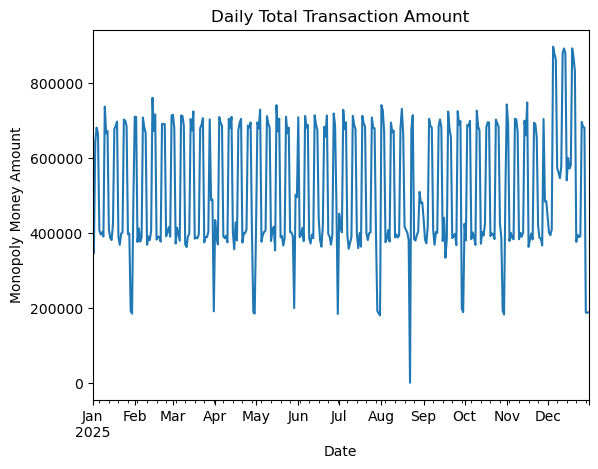

In [24]:
daily_total = data_time['monopoly_money_amount'].resample('D').sum()

daily_total.plot()
plt.title('Daily Total Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.show()

There are obvious cyclical changes and increase and decrease. 周期性

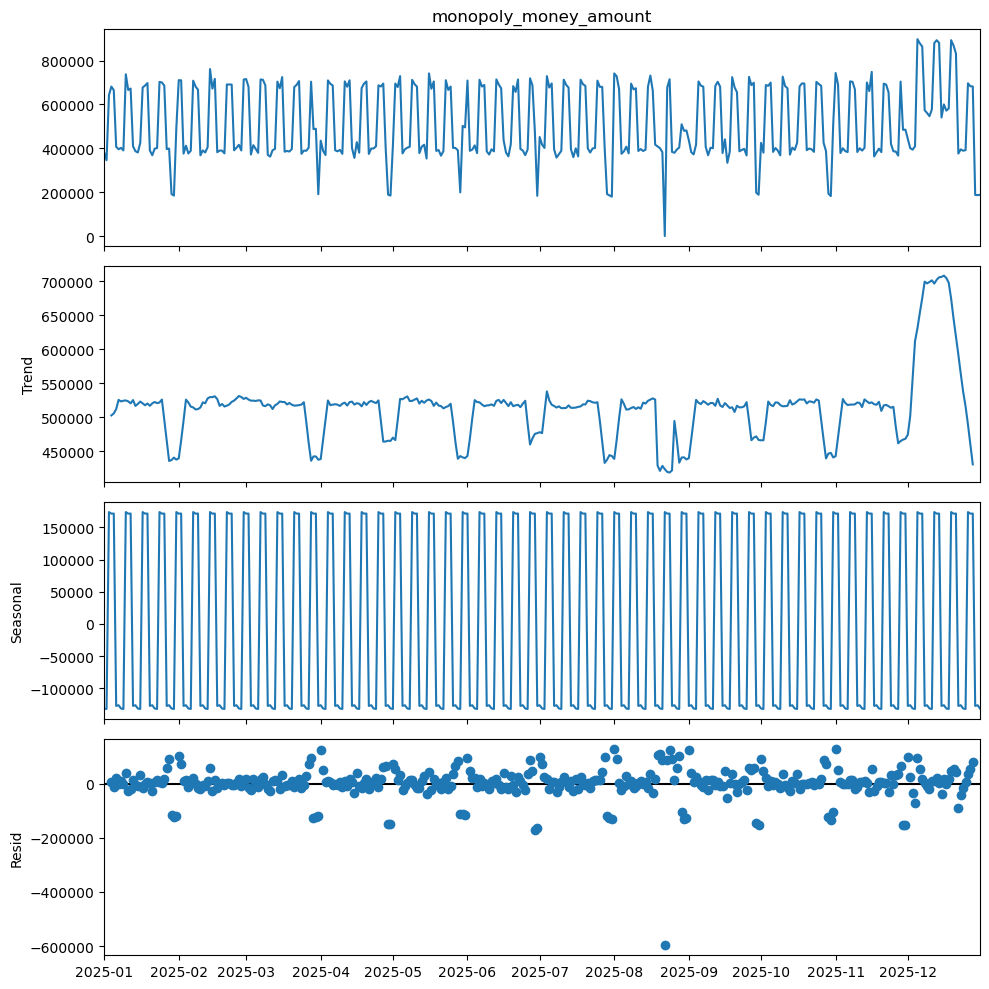

In [25]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to observe, trend, seasonality, and residuals
result = seasonal_decompose(daily_total, model='additive')

plt.rcParams.update({'figure.figsize': (10,10)})
result.plot()
plt.show()

原始时间序列、长期趋势、季节性和残差  
Observed: cyclical changes  
Trend: significant increase in December and decrease at the end of month  
Seasonal: regular weekly variations  
Residual: Observed removing trend and seasonal factors, outliers-missing data  

### Different between first and end of month

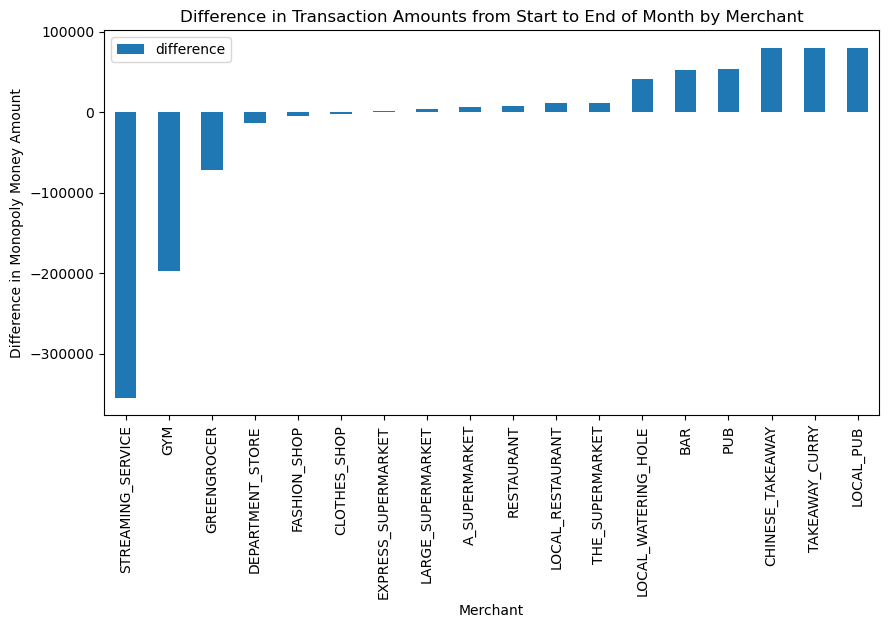

In [26]:
data2 = data.copy()
data2['month'] = data2['not_happened_yet_date'].dt.month
data2['year'] = data2['not_happened_yet_date'].dt.year

data_last_week = data2[data2['not_happened_yet_date'].dt.is_month_end]
monthly_end_totals = data_last_week.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().reset_index()
top_15_merchants_end_totals = monthly_end_totals.sort_values(by='monopoly_money_amount', ascending=False).head(15)

data_first_week = data2[data2['not_happened_yet_date'].dt.is_month_start]
monthly_start_totals = data_first_week.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().reset_index()
top_15_merchants_start_totals = monthly_start_totals.sort_values(by='monopoly_money_amount', ascending=False).head(15)

monthly_totals = pd.merge(top_15_merchants_end_totals, top_15_merchants_start_totals, on='to_randomly_generated_account', how='outer', suffixes=('_end', '_start'))
monthly_totals['monopoly_money_amount_end'] = monthly_totals['monopoly_money_amount_end'].fillna(0)
monthly_totals['monopoly_money_amount_start'] = monthly_totals['monopoly_money_amount_start'].fillna(0)
monthly_totals['difference'] = monthly_totals['monopoly_money_amount_end'] - monthly_totals['monopoly_money_amount_start']

monthly_totals.sort_values('difference', ascending=True).plot.bar(x='to_randomly_generated_account', y='difference', figsize=(10, 5))
plt.title('Difference in Transaction Amounts from Start to End of Month by Merchant')
plt.xlabel('Merchant')
plt.ylabel('Difference in Monopoly Money Amount')
plt.show()


transaction amounts at merchants such as pubs and restaurants increase towards the end of the month, while there is a significant decline in transactions for merchants like streaming services and gyms.

### Find which kinds of transactions decrease at the end of month

In [27]:
data_merchant = data_time[data_time['to_randomly_generated_account'].astype(str).str.isnumeric() == False]
data_merchant.head(10)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account
not_happened_yet_date,,,
2025-01-01,10371.0,4.00,CINEMA
2025-01-01,18555.0,4.10,HIPSTER_COFFEE_SHOP
2025-01-01,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP
2025-01-01,18555.0,1.45,COFFEE_SHOP
2025-01-01,18555.0,5.00,CAFE
2025-01-01,41378.0,2.55,COFFEE_SHOP
2025-01-01,41378.0,1.80,COFFEE_SHOP
2025-01-01,4428.0,2.55,A_CAFE
2025-01-01,4428.0,2.65,TOTALLY_A_REAL_COFFEE_SHOP


In [28]:
data_merchant.shape

(7615517, 3)

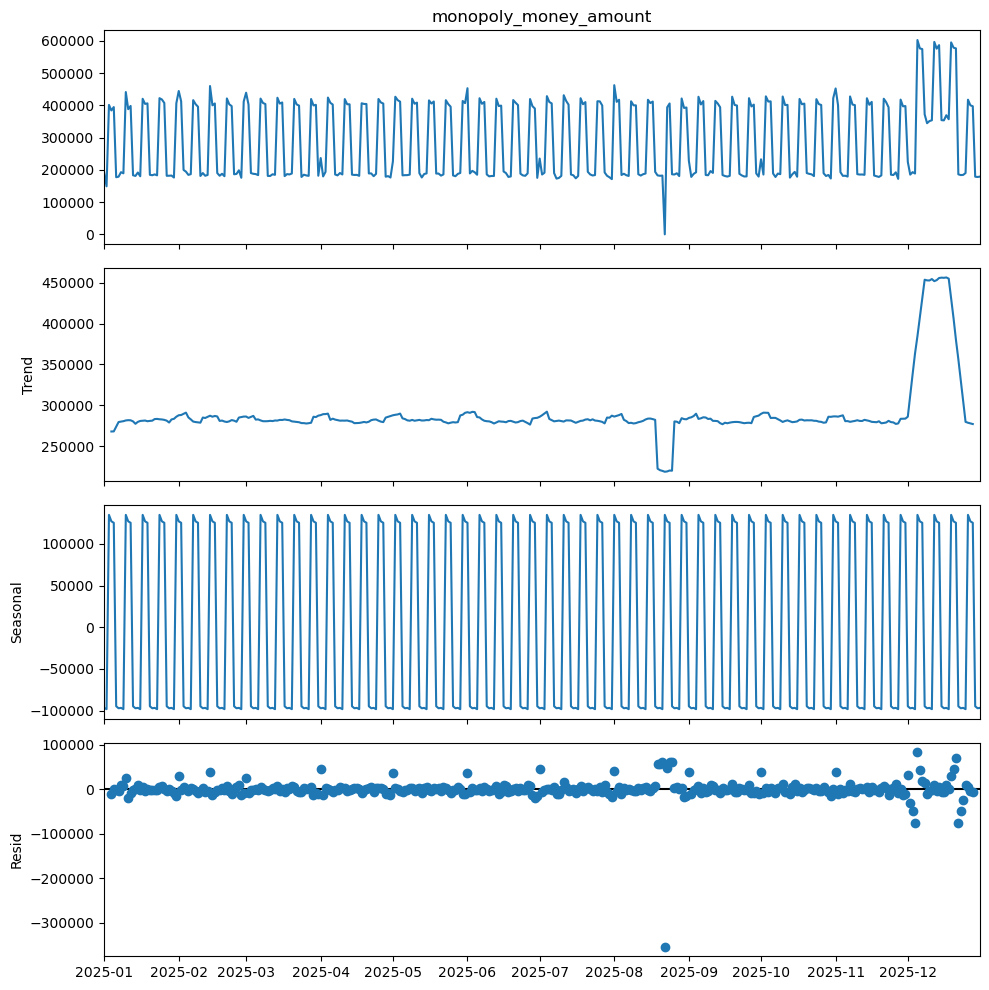

In [29]:
daily_total2 = data_merchant['monopoly_money_amount'].resample('D').sum()

result = seasonal_decompose(daily_total2, model='additive')
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot()
plt.show()

In [30]:
data_people = data_time[data_time['to_randomly_generated_account'].astype(str).str.isnumeric()]
data_people.head(10)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account
not_happened_yet_date,,,
2025-01-01,88339.0,2.40,40544
2025-01-01,18555.0,2.40,85149
2025-01-01,80792.0,1.95,18555
2025-01-01,39262.0,4.50,30264
2025-01-01,16801.0,6.00,82454
2025-01-01,2390.0,4.50,97770
2025-01-01,16339.0,6.50,60261
2025-01-01,23958.0,9.00,35965
2025-01-01,69266.0,4.50,71642


In [31]:
data_people.shape

(2532763, 3)

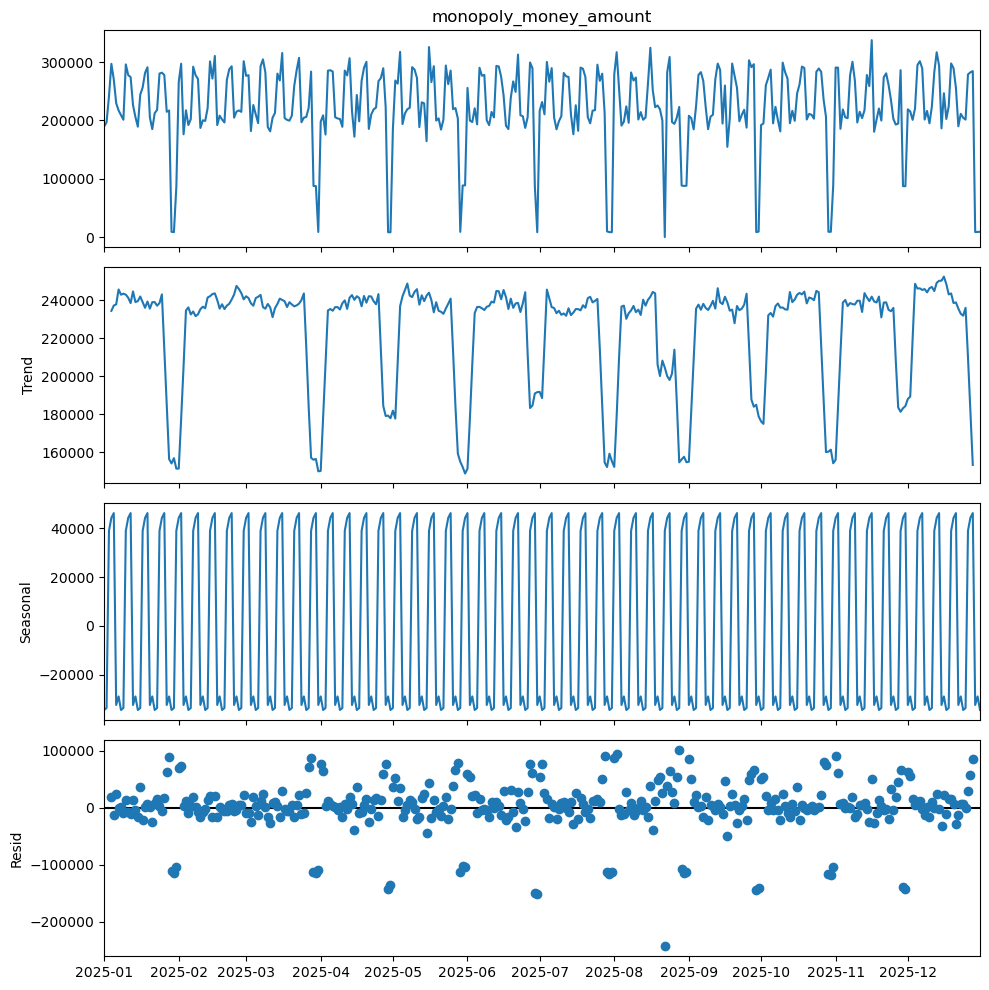

In [32]:
daily_total3 = data_people['monopoly_money_amount'].resample('D').sum()

result = seasonal_decompose(daily_total3, model='additive')
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot()
plt.show()

When we separate the transactions into two categories—merchant transactions and personal transfers  
 
Merchant transactions, fluctuate on a weekly basis, with an increase in December.  
Personal transfers, tend to drop towards the end of each month.

## Weekly and Monthly

### Merchant and transfer

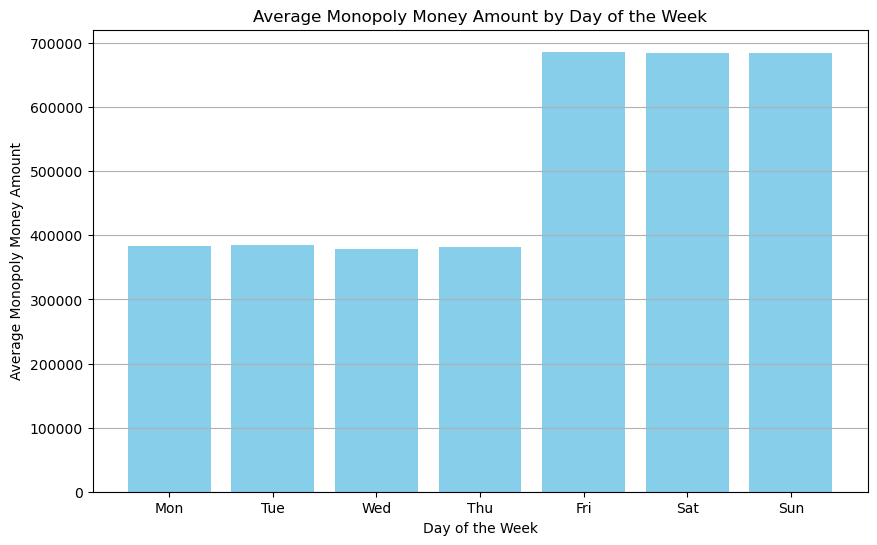

In [33]:
full_date_range = pd.date_range(start=data_time.index.min(), end=data_time.index.max(), freq='D')
weekday_counts = full_date_range.to_series().dt.dayofweek.value_counts().sort_index()

weekly_money = {i: data_time[data_time.index.weekday == i]['monopoly_money_amount'].resample('W').sum() for i in range(7)}
weekday_sums = {i: weekly_money[i].sum() for i in range(7)}

weekday_averages = {i: weekday_sums[i] / weekday_counts[i] for i in range(7)}
averages = [weekday_averages[i] for i in range(7)]

plt.figure(figsize=(10, 6))
plt.bar(range(7), averages, color='skyblue', tick_label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Monopoly Money Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Monopoly Money Amount')
plt.grid(axis='y')
plt.show()

In [34]:
print(weekday_sums)
print(weekday_counts)

{0: 19916790.939999998, 1: 19979303.02, 2: 20103512.819999997, 3: 19843699.49, 4: 35694018.95, 5: 35571394.970000006, 6: 35553515.3}
0    52
1    52
2    53
3    52
4    52
5    52
6    52
Name: count, dtype: int64


Because the missing data from 8.33, which is a Friday  
I updated the count for weekdays and recalculated the average transaction amounts.

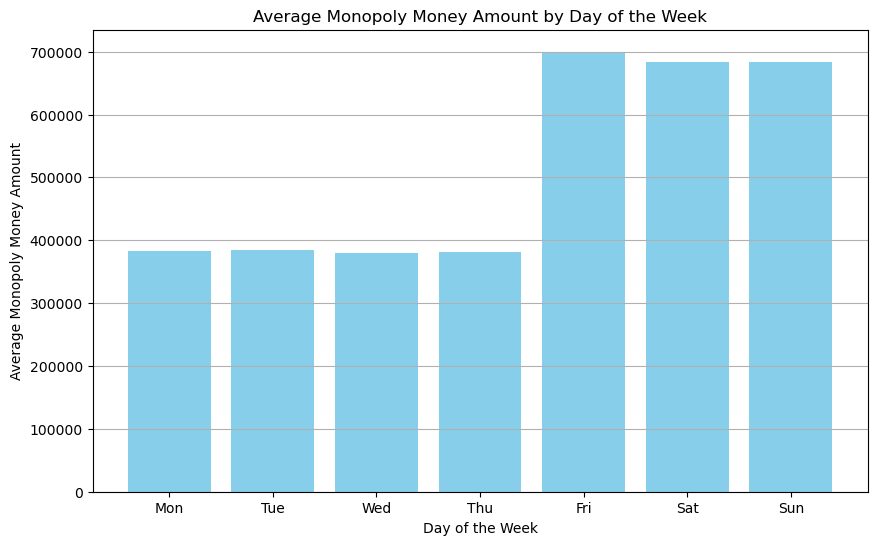

In [35]:
weekday_counts2 = pd.Series([52, 52, 53, 52, 51, 52, 52], index=[0, 1, 2, 3, 4, 5, 6])

weekday_averages2 = {i: weekday_sums[i] / weekday_counts2[i] for i in range(7)}
averages2 = [weekday_averages2[i] for i in range(7)]

plt.figure(figsize=(10, 6))
plt.bar(range(7), averages2, color='skyblue', tick_label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Monopoly Money Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Monopoly Money Amount')
plt.grid(axis='y')
plt.show()

The average transaction amounts on Friday, Saturday, and Sunday are significantly higher than on other days of the week  
Friday having the highest daily average transaction amount

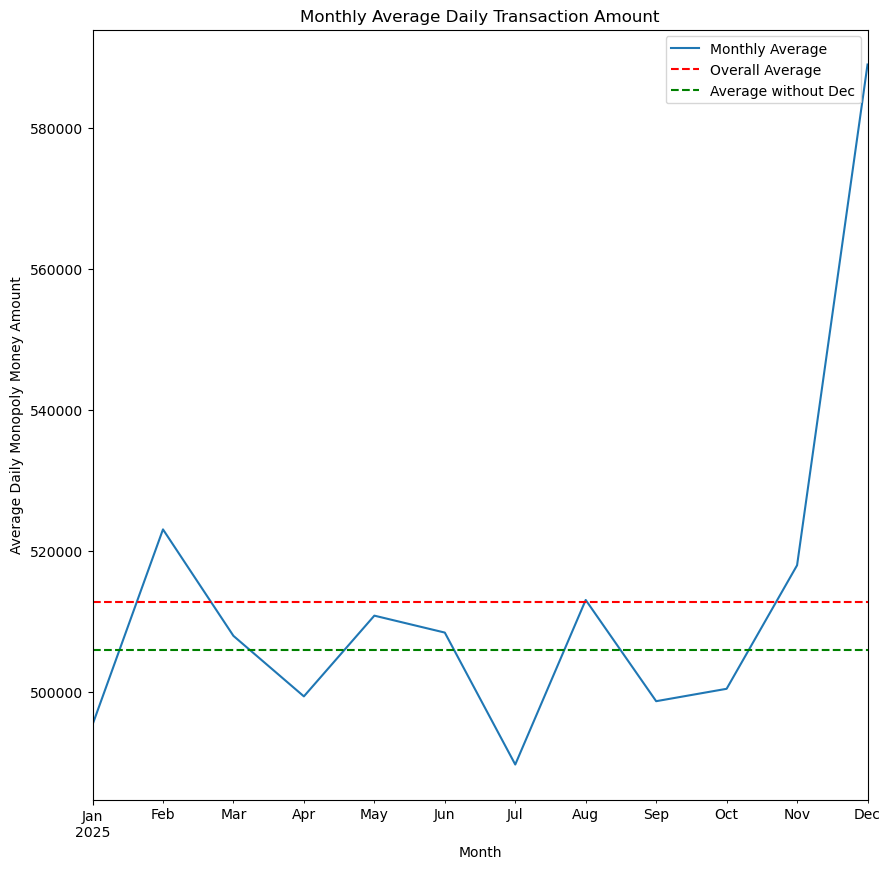

In [36]:
monthly_sum = data_time['monopoly_money_amount'].resample('M').sum()

monthly_days = data_time.index.to_series().resample('M').nunique()


monthly_average = monthly_sum / monthly_days
overall_average = monthly_average.mean()

monthly_average_without_december = monthly_average[monthly_average.index.month != 12]
overall_average_without_december = monthly_average_without_december.mean()

monthly_average.plot()
plt.axhline(y=overall_average, color='r', linestyle='--')
plt.axhline(y=overall_average_without_december, color='g', linestyle='--')

plt.title('Monthly Average Daily Transaction Amount')
plt.xlabel('Month')
plt.ylabel('Average Daily Monopoly Money Amount')
plt.legend(['Monthly Average', 'Overall Average', 'Average without Dec'])
plt.show()

December's average daily transaction is significantly higher than other months  
April, July, September, and October have averages that fall below the mean of all months (excluding December).

In [37]:
print(monthly_days)

not_happened_yet_date
2025-01-31    31
2025-02-28    28
2025-03-31    31
2025-04-30    30
2025-05-31    31
2025-06-30    30
2025-07-31    31
2025-08-31    30
2025-09-30    30
2025-10-31    31
2025-11-30    30
2025-12-31    31
Freq: M, Name: not_happened_yet_date, dtype: int64


### Merchant Only

In [38]:
data_merchant

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account
not_happened_yet_date,,,
2025-01-01,10371.0,4.00,CINEMA
2025-01-01,18555.0,4.10,HIPSTER_COFFEE_SHOP
2025-01-01,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP
2025-01-01,18555.0,1.45,COFFEE_SHOP
2025-01-01,18555.0,5.00,CAFE
...,...,...,...
2025-12-31,81404.0,1.80,TOTALLY_A_REAL_COFFEE_SHOP
2025-12-31,32185.0,2.65,COFFEE_SHOP
2025-12-31,32185.0,2.45,COFFEE_SHOP


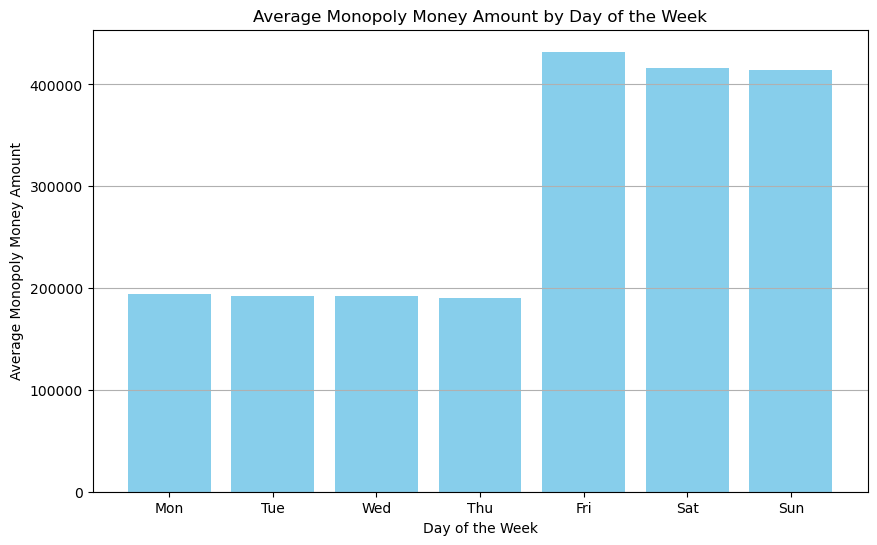

In [39]:
weekly_money3 = {i: data_merchant[data_merchant.index.weekday == i]['monopoly_money_amount'].resample('W').sum() for i in range(7)}
weekday_sums3 = {i: weekly_money3[i].sum() for i in range(7)}

weekday_counts3 = pd.Series([52, 52, 53, 52, 51, 52, 52], index=[0, 1, 2, 3, 4, 5, 6])

weekday_averages3 = {i: weekday_sums3[i] / weekday_counts3[i] for i in range(7)}
averages3 = [weekday_averages3[i] for i in range(7)]

plt.figure(figsize=(10, 6))
plt.bar(range(7), averages3, color='skyblue', tick_label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Monopoly Money Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Monopoly Money Amount')
plt.grid(axis='y')
plt.show()

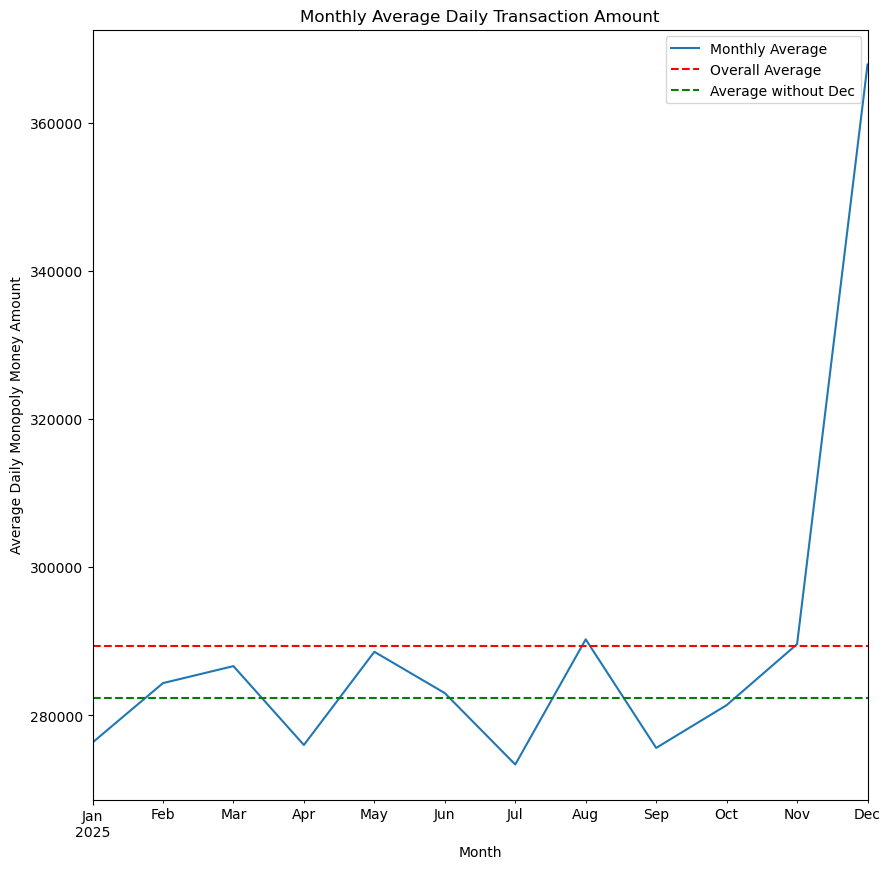

In [40]:
monthly_sum2 = data_merchant['monopoly_money_amount'].resample('M').sum()
monthly_days2 = data_merchant.index.to_series().resample('M').nunique()

monthly_average2 = monthly_sum2 / monthly_days2
overall_average2 = monthly_average2.mean()

monthly_average_without_december2 = monthly_average2[monthly_average2.index.month != 12]
overall_average_without_december2 = monthly_average_without_december2.mean()

monthly_average2.plot()
plt.axhline(y=overall_average2, color='r', linestyle='--')
plt.axhline(y=overall_average_without_december2, color='g', linestyle='--')

plt.title('Monthly Average Daily Transaction Amount')
plt.xlabel('Month')
plt.ylabel('Average Daily Monopoly Money Amount')
plt.legend(['Monthly Average', 'Overall Average', 'Average without Dec'])
plt.show()

Considering only merchant transactions, the results are similar  
Transactions on Friday, Saturday, and Sunday being higher than other days.  
December's transactions are far above the average, while April, July, and September are below the average.

## decrease in 3 months and increase in Dec

In [180]:
data_merchant2 = data[data['to_randomly_generated_account'].astype(str).str.isnumeric() == False]
data_merchant3 = data_merchant2[data_merchant2['not_happened_yet_date'].dt.month != 12]

In [181]:
data_merchant2

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,2025-01-01
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01
5,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP,2025-01-01
6,18555.0,1.45,COFFEE_SHOP,2025-01-01
7,18555.0,5.00,CAFE,2025-01-01
...,...,...,...,...
10148274,81404.0,1.80,TOTALLY_A_REAL_COFFEE_SHOP,2025-12-31
10148275,32185.0,2.65,COFFEE_SHOP,2025-12-31
10148276,32185.0,2.45,COFFEE_SHOP,2025-12-31
10148277,57569.0,14.00,WINE_BAR,2025-12-31


### Valid trading days

In [182]:
# Number of valid transaction days for each merchant per month
monthly_days = data_merchant2.groupby([data_merchant2['not_happened_yet_date'].dt.to_period('M'), 
                                      'to_randomly_generated_account'])['not_happened_yet_date'].nunique()
monthly_days = monthly_days.reset_index(name='transaction_days')
monthly_days

,not_happened_yet_date,to_randomly_generated_account,transaction_days
0,2025-01,ACCESSORY_SHOP,31
1,2025-01,A_CAFE,31
2,2025-01,A_LOCAL_COFFEE_SHOP,31
3,2025-01,A_SUPERMARKET,31
4,2025-01,BAR,31
...,...,...,...
921,2025-12,WE_HAVE_BEAN_WEIGHTING,30
922,2025-12,WHISKEY_BAR,31
923,2025-12,WHISKEY_SHOP,30
924,2025-12,WINE_BAR,31


In [286]:
# Actual number of days per month
days_in_month_2025 = {
    1: 31, 2: 28, 3: 31, 4: 30, 5: 31,
    6: 30, 7: 31, 8: 30, 9: 30, 10: 31,
    11: 30, 12: 31
}

monthly_days['days_in_month'] = monthly_days['not_happened_yet_date'].dt.month.map(days_in_month_2025)
monthly_days['diff'] = monthly_days['days_in_month'] - monthly_days['transaction_days']
print(monthly_days[monthly_days['diff'] > 2])

    not_happened_yet_date to_randomly_generated_account  transaction_days  \
29                2025-01                           GYM                 1   
61                2025-01             STREAMING_SERVICE                 1   
102               2025-02                       FLORIST                 1   
107               2025-02                           GYM                 1   
139               2025-02             STREAMING_SERVICE                 1   
184               2025-03                           GYM                 1   
216               2025-03             STREAMING_SERVICE                 1   
261               2025-04                           GYM                 1   
293               2025-04             STREAMING_SERVICE                 1   
338               2025-05                           GYM                 1   
370               2025-05             STREAMING_SERVICE                 1   
415               2025-06                           GYM                 1   

In [184]:
monthly_days.to_csv('monthly_days.csv')

In [185]:
#print(data[data['to_randomly_generated_account'] == 'STREAMING_SERVICE'])
#print(data[data['to_randomly_generated_account'] == 'GYM'])
#print(data[data['to_randomly_generated_account'] == 'FLORIST'])
#print(data[data['to_randomly_generated_account'] == 'TURKEY_FARM'])
print(monthly_days['to_randomly_generated_account'].nunique())

79


There are 79 stores for merchant transactions.  
"FLORIST" only makes transactions on February 14th  
"TURKEY FARM" only in December  
"STREAMING SERVICE" and "GYM" only transact on the first of each month.  

In [186]:
# Annual closing days of each store
close = monthly_days.groupby('to_randomly_generated_account')['diff'].sum().reset_index()
print(close[close['diff'] > 0])

   to_randomly_generated_account  diff
10            CHINESE_RESTAURANT     1
21              ELECTRONICS_SHOP     8
25                       FLORIST    27
30                           GYM   352
32      HIPSTER_ELECTRONICS_SHOP    16
40                  LIQUOR_STORE    14
53            RESTAURANT_VOUCHER    12
54                     ROASTERIE    12
62             STREAMING_SERVICE   352
65                      TEA_SHOP    12
66                     TECH_SHOP     4
70        TO_BEAN_OR_NOT_TO_BEAN    13
72                   TURKEY_FARM    14
74        WE_HAVE_BEAN_WEIGHTING    12
76                  WHISKEY_SHOP    12
78                   WINE_CELLAR    12


### Average monthly transaction volume of each merchant

In [268]:
days_in_month_2025 = {
    1: 31, 2: 28, 3: 31, 4: 30, 5: 31,
    6: 30, 7: 31, 8: 30, 9: 30, 10: 31,
    11: 30, 12: 31
}

monthly_sum = data_merchant2.groupby([data_merchant2['not_happened_yet_date'].dt.to_period('M'), 
                                      'to_randomly_generated_account'])['monopoly_money_amount'].sum().reset_index()

monthly_sum['days_in_month'] = monthly_sum['not_happened_yet_date'].dt.month.map(days_in_month_2025)

monthly_sum['daily_average'] = monthly_sum['monopoly_money_amount'] / monthly_sum['days_in_month']
monthly_sum

,not_happened_yet_date,to_randomly_generated_account,monopoly_money_amount,days_in_month,daily_average
0,2025-01,ACCESSORY_SHOP,6238.00,31,201.225806
1,2025-01,A_CAFE,100404.55,31,3238.856452
2,2025-01,A_LOCAL_COFFEE_SHOP,99639.70,31,3214.183871
3,2025-01,A_SUPERMARKET,444395.96,31,14335.353548
4,2025-01,BAR,714963.00,31,23063.322581
...,...,...,...,...,...
921,2025-12,WE_HAVE_BEAN_WEIGHTING,126254.56,31,4072.727742
922,2025-12,WHISKEY_BAR,107183.50,31,3457.532258
923,2025-12,WHISKEY_SHOP,126637.55,31,4085.082258
924,2025-12,WINE_BAR,106123.00,31,3423.322581


In [269]:
monthly_sum.to_csv('monthly_sum.csv')

The above calculates the average value of each merchant per month  
The following is the annual average value of each merchant, with and without December. 

In [270]:
merchant_mean = monthly_sum[monthly_sum['not_happened_yet_date'].dt.month != 12].groupby(['to_randomly_generated_account'])['daily_average'].mean()
merchant_mean.name = 'mean_without_dec'
merchant_mean = merchant_mean.reset_index()

merchant_mean = merchant_mean.merge(
    monthly_sum.groupby(['to_randomly_generated_account'])['daily_average'].mean().reset_index(name='mean_with_dec'),
    on='to_randomly_generated_account',
    how='right'
)

merchant_mean

,to_randomly_generated_account,mean_without_dec,mean_with_dec
0,ACCESSORY_SHOP,206.838940,205.785157
1,A_CAFE,3136.600687,3144.187458
2,A_LOCAL_COFFEE_SHOP,3127.984740,3136.418673
3,A_SUPERMARKET,15528.269624,15533.333365
4,BAR,23409.024487,23242.007661
...,...,...,...
74,WE_HAVE_BEAN_WEIGHTING,334.128617,645.678544
75,WHISKEY_BAR,3773.957513,3747.588742
76,WHISKEY_SHOP,324.816583,638.172056
77,WINE_BAR,3745.039146,3718.229432


In [271]:
merchant_mean.to_csv('merchant_mean.csv')

### Update based on merchant classification results

In [272]:
monthly_sum_path = 'C:/Users/Demi/0-Mini Project/monthly_sum.csv'
monthly_sum_df = pd.read_csv(monthly_sum_path)

finalised_merchant_categories_path = 'C:/Users/Demi/0-Mini Project/finalised_merchant_categories.xlsx'
finalised_merchant_categories_df = pd.read_excel(finalised_merchant_categories_path)

In [273]:
categories = finalised_merchant_categories_df.columns
category_account_pairs = []

for category in categories:
    # Drop NaN values and clean account names
    accounts = finalised_merchant_categories_df[category].dropna().apply(lambda x: x.strip("'"))
    for account in accounts:
        category_account_pairs.append({'account': account, 'category': category})

category_df = pd.DataFrame(category_account_pairs)
category_df

,account,category
0,TOY_SHOP,Children
1,SCHOOL_SUPPLY_STORE,Children
2,KIDS_CLOTHING_SHOP,Children
3,KIDS_ACTIVITY_CENTRE,Children
4,CHILDRENDS_SHOP,Children
...,...,...
74,WHISKEY_SHOP,Alcohol Store
75,LIQUOR_STORE,Alcohol Store
76,WINE_CELLAR,Alcohol Store
77,GYM,Gym


In [274]:
print(category_df['category'].nunique())
unique_categories = category_df['category'].unique()
unique_categories.tolist()

26


['Children',
 'Cinema',
 'Gaming',
 'Streaming service',
 'Home ',
 'Pets',
 'Department Store',
 'Clothing store',
 'Sports store',
 'Accessory shop',
 'Butcher',
 'Turkey',
 'Greengrocer',
 'Supermarket',
 'Café',
 'Roasterie/Tea shop',
 'Bookstore',
 'Technology store',
 'Restaurant/Takeaway',
 'Fast Food',
 'Bar',
 'Pub',
 'Cookshop',
 'Alcohol Store',
 'Gym',
 'Flower shop']

In [275]:
cate_merchant = monthly_sum_df.merge(category_df, left_on='to_randomly_generated_account', right_on='account', how='left')
cate_merchant.drop('account', axis=1, inplace=True)

cate_merchant.head()

,Unnamed: 0,not_happened_yet_date,to_randomly_generated_account,monopoly_money_amount,days_in_month,daily_average,category
0,0,2025-01,ACCESSORY_SHOP,6238.00,31,201.225806,Accessory shop
1,1,2025-01,A_CAFE,100404.55,31,3238.856452,Café
2,2,2025-01,A_LOCAL_COFFEE_SHOP,99639.70,31,3214.183871,Café
3,3,2025-01,A_SUPERMARKET,444395.96,31,14335.353548,Supermarket
4,4,2025-01,BAR,714963.00,31,23063.322581,Bar


In [276]:
# the sum of each merchant in each category
category_sum = cate_merchant.groupby(['not_happened_yet_date', 'category'])['daily_average'].sum().reset_index()
category_sum

,not_happened_yet_date,category,daily_average
0,2025-01,Accessory shop,386.064516
1,2025-01,Alcohol Store,960.345161
2,2025-01,Bar,56873.806452
3,2025-01,Bookstore,3126.032258
4,2025-01,Butcher,626.483871
...,...,...,...
285,2025-12,Sports store,7090.741935
286,2025-12,Streaming service,953.230000
287,2025-12,Supermarket,61580.912903
288,2025-12,Technology store,6631.354839


In [277]:
category_sum.to_csv('category_sum.csv')

In [282]:
category_4 = category_sum[category_sum['not_happened_yet_date'] == '2025-04']
category_4.to_csv('category_4.csv')

In [283]:
category_7 = category_sum[category_sum['not_happened_yet_date'] == '2025-07']
category_7.to_csv('category_7.csv')

In [284]:
category_9 = category_sum[category_sum['not_happened_yet_date'] == '2025-09']
category_9.to_csv('category_9.csv')

In [285]:
category_12 = category_sum[category_sum['not_happened_yet_date'] == '2025-12']
category_12.to_csv('category_12.csv')

Find the average monthly consumption of various types above  
The following is the annual average value of various types of consumption, with and without December.

In [287]:
category_sum_path = 'C:/Users/Demi/0-Mini Project/category_sum.csv'
category_sum_df = pd.read_csv(category_sum_path)

category_sum_df['not_happened_yet_date'] = pd.to_datetime(category_sum_df['not_happened_yet_date'])
category_sum_df['month'] = category_sum_df['not_happened_yet_date'].dt.month

category_mean_without_dec = category_sum_df[category_sum_df['month'] != 12].groupby('category')['daily_average'].mean()
category_mean_without_dec.name = 'mean_without_dec'
category_mean_without_dec = category_mean_without_dec.reset_index()

category_mean_with_dec = category_sum_df.groupby('category')['daily_average'].mean().reset_index(name='mean_with_dec')
category_mean = category_mean_without_dec.merge(category_mean_with_dec, on='category', how='right')

category_mean

,category,mean_without_dec,mean_with_dec
0,Accessory shop,401.905753,401.779199
1,Alcohol Store,960.029307,1895.714929
2,Bar,58195.707726,57781.314071
3,Bookstore,3105.685379,3264.292243
4,Butcher,616.737167,804.734876
5,Café,18513.534346,18553.339683
6,Children,11620.226365,12478.218254
7,Cinema,2244.909161,2377.707053
8,Clothing store,14393.477273,15557.472446
9,Cookshop,624.147249,684.962935


In [279]:
category_mean.to_csv('category_mean.csv')